In [2]:
## <1> 
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import math
from zipfile import ZipFile
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12, 10 # Make it larger for the reader, during data visualization 

In [3]:
# <2> 

import os  
    
# Get the current working  
# directory (CWD)  
cwd = os.getcwd()  
    
# Print the current working   
# directory (CWD)  
# which is root in this case 
print("Current working directory is:", cwd) 


Current working directory is: C:\Users\Administrator


In [4]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# <4> 
# The folder contains files that are not the yearly data files, I only grabbed necessary files 
FILE_PATH = "CollegeScorecard_Raw_Data"
file_names = os.listdir(FILE_PATH)
file_names = [x for x in file_names if x.startswith("MERGED")]
file_names

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [5]:
len(file_names) # Number of files 

23

In [6]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

df1 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1996_97_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]) # Can do one at a time, with year 
df1
df1.insert(2, "1997", 1997) 
df1

,UNITID,INSTNM,1997,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
0,100636,Community College of the Air Force,1997,AL,0,NaN,NaN
1,100654,Alabama A & M University,1997,AL,5,NaN,NaN
2,100663,University of Alabama at Birmingham,1997,AL,5,NaN,NaN
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,1997,AL,5,NaN,NaN
4,100690,Amridge University,1997,AL,5,NaN,NaN
...,...,...,...,...,...,...,...
7002,428347,American Institute of Medical-Dental Technology,1997,UT,7,NaN,NaN
7003,428365,INSTITUTO DE ESTETICA Y BELLAZA MARUGIE,1997,PR,9,NaN,NaN
7004,428374,KEISER COLLEGE-DAYTONA,1997,FL,5,NaN,NaN
7005,428392,Klamath Community College,1997,OR,8,NaN,NaN


In [7]:
df1 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1996_97_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]) # Issue here is can loop, but probably need to concatenate all csv files then insert years  
df1.insert(0, "Year", 1997) 
df2 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1997_98_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]) # For here just concatenate dataframes, looping very helpful and makes task much easier 
df2.insert(0, "Year", 1998) 
df3 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1998_99_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df3.insert(0, "Year", 1999) 
df4 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED1999_00_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df4.insert(0, "Year", 2000) 
df5 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2000_01_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df5.insert(0, "Year", 2001) 
df6 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2001_02_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df6.insert(0, "Year", 2002) 
df7 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2002_03_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df7.insert(0, "Year", 2003) 
df8 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2003_04_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df8.insert(0, "Year", 2004) 
df9 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2004_05_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]) 
df9.insert(0, "Year", 2005) 
df10 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2005_06_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]) 
df10.insert(0, "Year", 2006) 
df11 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2006_07_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df11.insert(0, "Year", 2007) 
df12 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2007_08_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df12.insert(0, "Year", 2008) 
df13 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2008_09_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df13.insert(0, "Year", 2009) 
df14 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2009_10_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df14.insert(0, "Year", 2010) 
df15 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2010_11_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df15.insert(0, "Year", 2011) 
df16 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2011_12_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df16.insert(0, "Year", 2012) 
df17 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2012_13_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]) 
df17.insert(0, "Year", 2013) 
df18 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2013_14_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]) 
df18.insert(0, "Year", 2014) 
df19 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2014_15_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df19.insert(0, "Year", 2015) 
df20 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2015_16_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df20.insert(0, "Year", 2016) 
df21 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2016_17_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df21.insert(0, "Year", 2017) 
df22 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
df22.insert(0, "Year", 2018) 
df23 = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2018_19_PP.csv', usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]) # It would behoove me to loop this 
df23.insert(0, "Year", 2019) 


In [8]:
df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23]) # Again very tedious need concatenate all csv files, make dataframe from one csv, inserting years would be tricky done correctly
df

,Year,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
0,1997,100636,Community College of the Air Force,AL,0.0,NaN,NaN
1,1997,100654,Alabama A & M University,AL,5.0,NaN,NaN
2,1997,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN
3,1997,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN
4,1997,100690,Amridge University,AL,5.0,NaN,NaN
...,...,...,...,...,...,...,...
6801,2019,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0
6802,2019,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0
6803,2019,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN
6804,2019,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0


In [9]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

df.shape# Rows and columns 

(163331, 7)

In [10]:
df.head(1) # Head of one showing first head 

,Year,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
0,1997,100636,Community College of the Air Force,AL,0.0,NaN,NaN


In [11]:
df.tail(1)# Head of one showing last tail 

,Year,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
6805,2019,49146401,ABC Adult School - Cabrillo Lane,CA,8.0,NaN,NaN


In [12]:
df.sample(1)# Head of one showing one random sample 

,Year,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
6477,2016,461740,Buckner Barber School,TX,6.0,NaN,NaN


In [13]:
df.describe() # Stats with describe 

,Year,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,163331.000000,1.633310e+05,163330.000000,44911.000000,79194.000000
mean,2008.249481,9.432395e+05,4.554693,0.692946,11665.505367
std,6.608266,4.571721e+06,2.189217,0.217062,9985.998016
min,1997.000000,1.006360e+05,0.000000,0.000000,0.000000
25%,2003.000000,1.633380e+05,3.000000,0.555000,3776.000000
50%,2009.000000,2.127800e+05,5.000000,0.717500,9285.000000
75%,2014.000000,4.075680e+05,6.000000,0.857100,16146.000000
max,2019.000000,4.914640e+07,9.000000,1.000000,74787.000000


In [14]:
df.info # Shows missing values 

<bound method DataFrame.info of       Year    UNITID                                    INSTNM STABBR  REGION  \
0     1997    100636        Community College of the Air Force     AL     0.0   
1     1997    100654                  Alabama A & M University     AL     5.0   
2     1997    100663       University of Alabama at Birmingham     AL     5.0   
3     1997    100672    ALABAMA AVIATION AND TECHNICAL COLLEGE     AL     5.0   
4     1997    100690                        Amridge University     AL     5.0   
...    ...       ...                                       ...    ...     ...   
6801  2019  48511112         Georgia Military College - Dublin     GA     5.0   
6802  2019  48511113        Georgia Military College - Eastman     GA     5.0   
6803  2019  48616901  American College of Barbering - Florence     KY     5.0   
6804  2019  49005401      HCI College - Fort Lauderdale Campus     FL     5.0   
6805  2019  49146401          ABC Adult School - Cabrillo Lane     CA     8.0

In [15]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23]) # Again very tedious need concatenate all csv files, make dataframe from one csv, inserting years would be tricky 
df
df = df.set_index( "INSTNM", drop = False) # Find and display, selects the column "INSTMN" then filters to "University of Maryland-Baltimore County", can filter out later for Tuition Info
df.loc["University of Maryland-Baltimore County"]


,Year,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
INSTNM,,,,,,,
University of Maryland-Baltimore County,1997,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN
University of Maryland-Baltimore County,1998,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN
University of Maryland-Baltimore County,1999,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN
University of Maryland-Baltimore County,2000,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN
University of Maryland-Baltimore County,2001,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0
University of Maryland-Baltimore County,2002,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0
University of Maryland-Baltimore County,2003,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0
University of Maryland-Baltimore County,2004,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0
University of Maryland-Baltimore County,2005,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0


In [16]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

df = df.set_index( "INSTNM", drop = False) # Find and display, selects the column "INSTMN" then filters to "University of Maryland-Baltimore County", can filter out later for Tuition Info
df.loc["University of Maryland-Baltimore County"]


,Year,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
INSTNM,,,,,,,
University of Maryland-Baltimore County,1997,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN
University of Maryland-Baltimore County,1998,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN
University of Maryland-Baltimore County,1999,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN
University of Maryland-Baltimore County,2000,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN
University of Maryland-Baltimore County,2001,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0
University of Maryland-Baltimore County,2002,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0
University of Maryland-Baltimore County,2003,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0
University of Maryland-Baltimore County,2004,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0
University of Maryland-Baltimore County,2005,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0


In [17]:
df.loc["University of Maryland-Baltimore County"].shape  # Similar investigation as last time 

(23, 7)

In [18]:
df.loc["University of Maryland-Baltimore County"].head(1) # Similar investigation as last time 

,Year,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
INSTNM,,,,,,,
University of Maryland-Baltimore County,1997,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN


In [19]:
df.loc["University of Maryland-Baltimore County"].tail(1)  # Similar investigation as last time 

,Year,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
INSTNM,,,,,,,
University of Maryland-Baltimore County,2019,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0


In [20]:
df.loc["University of Maryland-Baltimore County"].describe()  # Similar investigation as last time 

,Year,UNITID,REGION,ADM_RATE,TUITIONFEE_IN
count,23.00000,23.0,23.0,18.000000,19.000000
mean,2008.00000,163268.0,2.0,0.640694,9004.842105
std,6.78233,0.0,0.0,0.052728,1825.795421
min,1997.00000,163268.0,2.0,0.568300,5490.000000
25%,2002.50000,163268.0,2.0,0.597600,8270.000000
50%,2008.00000,163268.0,2.0,0.632100,8872.000000
75%,2013.50000,163268.0,2.0,0.689375,10226.000000
max,2019.00000,163268.0,2.0,0.717400,11778.000000


In [21]:
df.loc["University of Maryland-Baltimore County"].info()  # Similar investigation as last time 

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, University of Maryland-Baltimore County to University of Maryland-Baltimore County
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           23 non-null     int64  
 1   UNITID         23 non-null     int64  
 2   INSTNM         23 non-null     object 
 3   STABBR         23 non-null     object 
 4   REGION         23 non-null     float64
 5   ADM_RATE       18 non-null     float64
 6   TUITIONFEE_IN  19 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.4+ KB


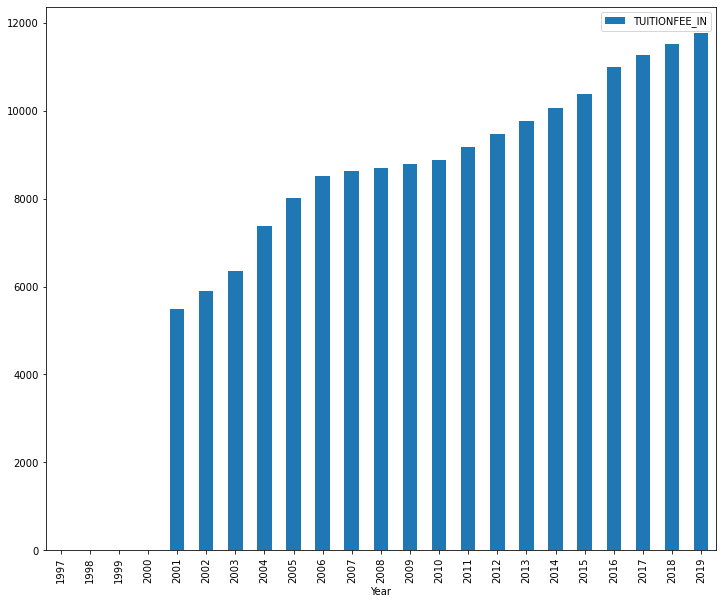

In [22]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart
df.loc["University of Maryland-Baltimore County"].plot(kind='bar',x='Year',y='TUITIONFEE_IN')


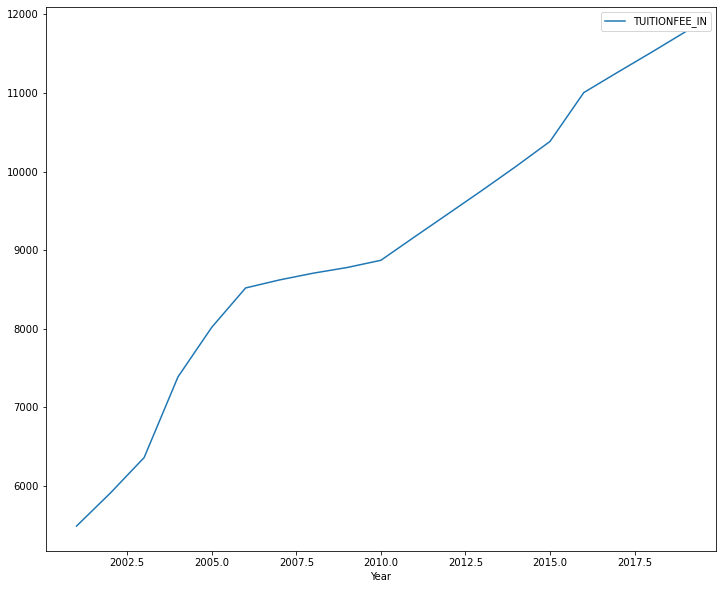

In [23]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart
df.loc["University of Maryland-Baltimore County"].plot(kind='line',x='Year',y='TUITIONFEE_IN')

In [24]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List




In [25]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

UMBC_Percent_Change = [5490,5910,6362,7388,8020,8520,8622,8708,8780,8872,9171,9467,9767,10068,10384,11006,11264,11518,11778]

for a, b in zip(UMBC_Percent_Change[::1], UMBC_Percent_Change[1::1]):
    print (100 * (b - a) / a)

7.6502732240437155
7.648054145516075
16.12700408676517
8.554412560909583
6.234413965087282
1.1971830985915493
0.9974483878450475
0.8268259072117593
1.0478359908883828
3.3701532912533816
3.227565151019518
3.1689025034329776
3.081806081703696
3.1386571315057608
5.989984591679507
2.344175904052335
2.254971590909091
2.2573363431151243


In [26]:
print ([100 * (b - a) / a for a, b in zip(UMBC_Percent_Change[::1], UMBC_Percent_Change[1::1])])

[7.6502732240437155, 7.648054145516075, 16.12700408676517, 8.554412560909583, 6.234413965087282, 1.1971830985915493, 0.9974483878450475, 0.8268259072117593, 1.0478359908883828, 3.3701532912533816, 3.227565151019518, 3.1689025034329776, 3.081806081703696, 3.1386571315057608, 5.989984591679507, 2.344175904052335, 2.254971590909091, 2.2573363431151243]


In [27]:
UMBC_Percent_Change=([100 * (b - a) / a for a, b in zip(UMBC_Percent_Change[::1],UMBC_Percent_Change[1::1])])
Years=(['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])

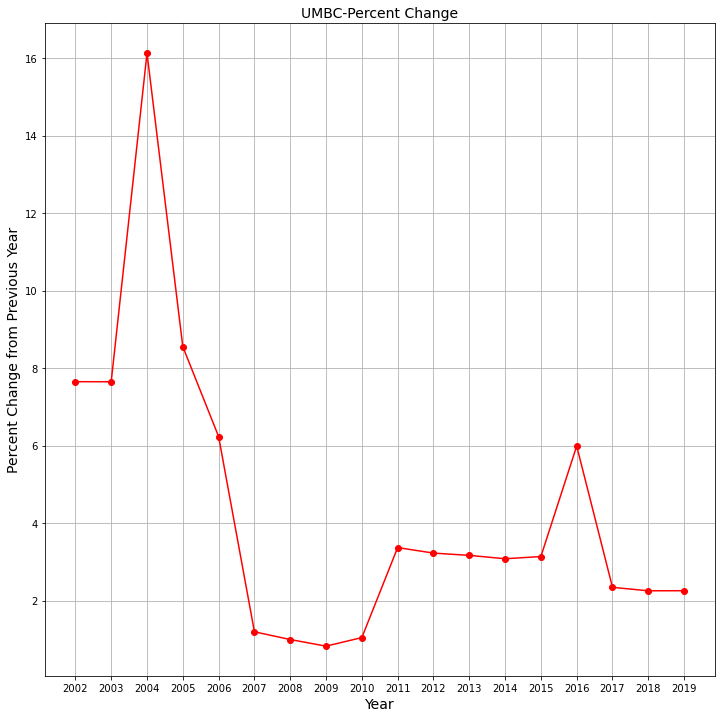

In [28]:

Year = Years
Percent_Change = UMBC_Percent_Change


fig, ax = plt.subplots(figsize=(12,12))

ax.plot(Year, Percent_Change, color='red', marker='o')

ax.set_title('UMBC-Percent Change', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percent Change from Previous Year', fontsize=14)
ax.grid(True)

In [102]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

John_Hopkins_Percent_Change = [5490,5910,6362,7388,8020,8520,8622,8708,8780,8872,9171,9467,9767,10068,10384,11006,11264,11518,11778]

for a, b in zip(UMBC_Percent_Change[::1], UMBC_Percent_Change[1::1]):
    print (100 * (b - a) / a)


In [29]:

# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23]) # Again very tedious need concatenate all csv files, make dataframe from one csv, inserting years would be tricky 
df
df = df.set_index( "INSTNM", drop = False) # Find and display, selects the column "INSTMN" then filters to "University of Maryland-Baltimore County", can filter out later for Tuition Info
df.loc["Johns Hopkins University"]




,Year,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN
INSTNM,,,,,,,
Johns Hopkins University,1997,162928,Johns Hopkins University,MD,2.0,NaN,NaN
Johns Hopkins University,1998,162928,Johns Hopkins University,MD,2.0,NaN,NaN
Johns Hopkins University,1999,162928,Johns Hopkins University,MD,2.0,NaN,NaN
Johns Hopkins University,2000,162928,Johns Hopkins University,MD,2.0,NaN,NaN
Johns Hopkins University,2001,162928,Johns Hopkins University,MD,2.0,NaN,24930.0
Johns Hopkins University,2002,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0
Johns Hopkins University,2003,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0
Johns Hopkins University,2004,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0
Johns Hopkins University,2005,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0


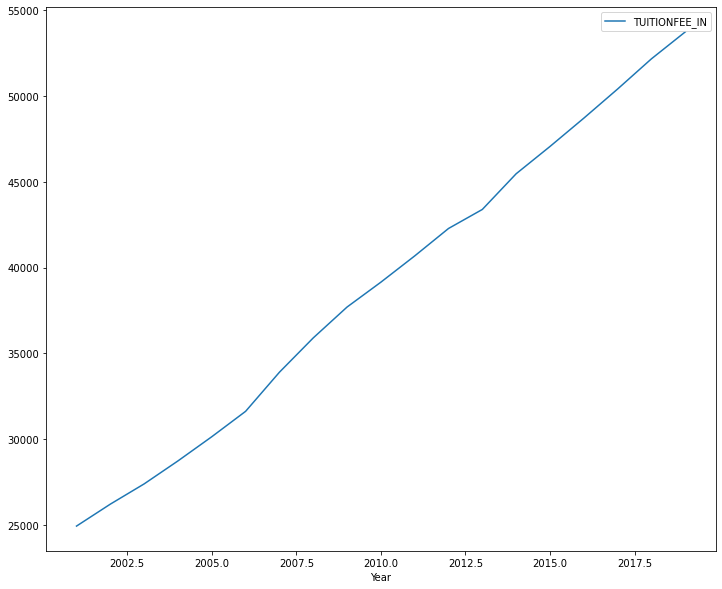

In [31]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together
# <13> 

df.loc["Johns Hopkins University"].plot(kind='line',x='Year',y='TUITIONFEE_IN')

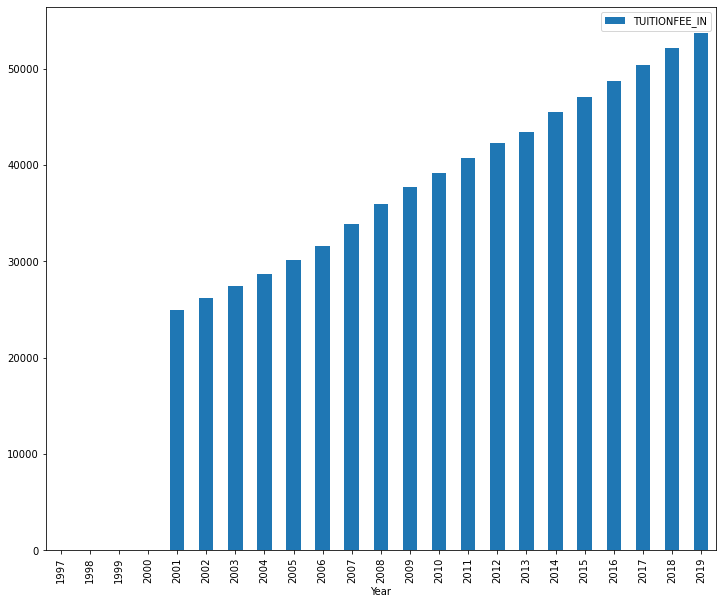

In [32]:
df.loc["Johns Hopkins University"].plot(kind='bar',x='Year',y='TUITIONFEE_IN')

In [18]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

df = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23]) # Again very tedious need concatenate all csv files, make dataframe from one csv, inserting years would be tricky 
df
df = df.set_index( "INSTNM", drop = False) # Find and display, selects the column "INSTMN" then filters to "John Hopkins", can filter out later for Tuition Info
JOHN_H=df.loc["Johns Hopkins University","TUITIONFEE_IN"]
JOHN_H



INSTNM
Johns Hopkins University        NaN
Johns Hopkins University        NaN
Johns Hopkins University        NaN
Johns Hopkins University        NaN
Johns Hopkins University    24930.0
Johns Hopkins University    26210.0
Johns Hopkins University    27390.0
Johns Hopkins University    28730.0
Johns Hopkins University    30140.0
Johns Hopkins University    31620.0
Johns Hopkins University    33900.0
Johns Hopkins University    35900.0
Johns Hopkins University    37700.0
Johns Hopkins University    39150.0
Johns Hopkins University    40680.0
Johns Hopkins University    42280.0
Johns Hopkins University    43390.0
Johns Hopkins University    45470.0
Johns Hopkins University    47060.0
Johns Hopkins University    48710.0
Johns Hopkins University    50410.0
Johns Hopkins University    52170.0
Johns Hopkins University    53740.0
Name: TUITIONFEE_IN, dtype: float64

In [24]:

# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

John_Hopkins_Percent_Change = [24930,26210,27390,28730,30140.0,31620.0,33900.0,35900,37700.0,39150.0,40680.0,42280.0,43390.0,45470.0,47060.0,48710.0,50410.0,52170.0,53740.0]

for a, b in zip(John_Hopkins_Percent_Change[::1], John_Hopkins_Percent_Change[1::1]):
    print (100 * (b - a) / a)


5.134376253509828
4.50209843571156
4.8922964585615185
4.907761921336582
4.91041804910418
7.2106261859582546
5.899705014749262
5.013927576601671
3.8461538461538463
3.9080459770114944
3.933136676499508
2.6253547776726585
4.793731274487209
3.4968110842313616
3.5061623459413513
3.4900431122972697
3.491370759769887
3.0093923710944988


In [32]:
print ([100 * (b - a) / a for a, b in zip(John_Hopkins_Percent_Change[::1], John_Hopkins_Percent_Change[1::1])])

[5.134376253509828, 4.50209843571156, 4.8922964585615185, 4.907761921336582, 4.91041804910418, 7.2106261859582546, 5.899705014749262, 5.013927576601671, 3.8461538461538463, 3.9080459770114944, 3.933136676499508, 2.6253547776726585, 4.793731274487209, 3.4968110842313616, 3.5061623459413513, 3.4900431122972697, 3.491370759769887, 3.0093923710944988]


In [35]:
JOHN_H_PERCENT_CHANGE=([100 * (b - a) / a for a, b in zip(John_Hopkins_Percent_Change[::1], John_Hopkins_Percent_Change[1::1])])

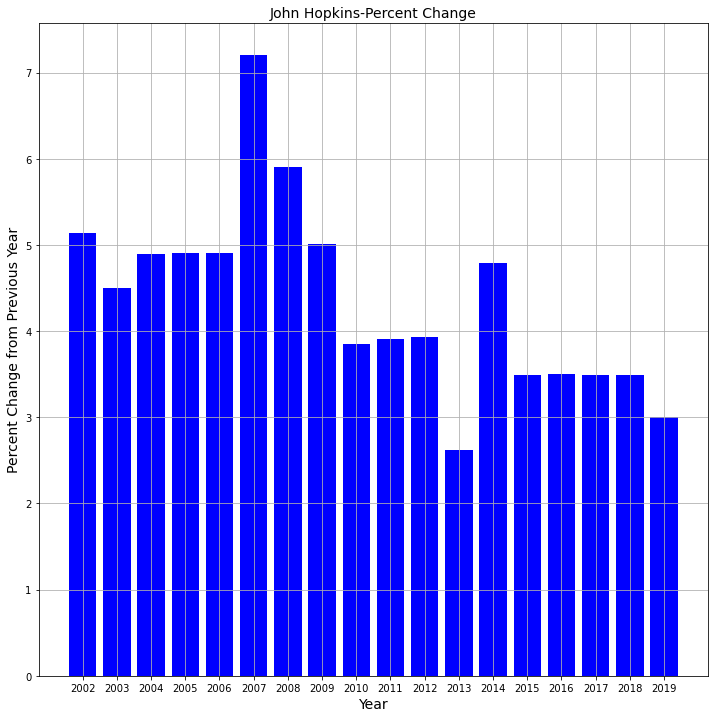

In [62]:
Years=(['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
Year = Years
Percent_Change = JOHN_H_PERCENT_CHANGE

fig, ax = plt.subplots(figsize=(12,12))

ax.bar(Year, Unemployment_Rate, color='Blue')
ax.set_title('John Hopkins-Percent Change', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percent Change from Previous Year', fontsize=14)
ax.grid(True)

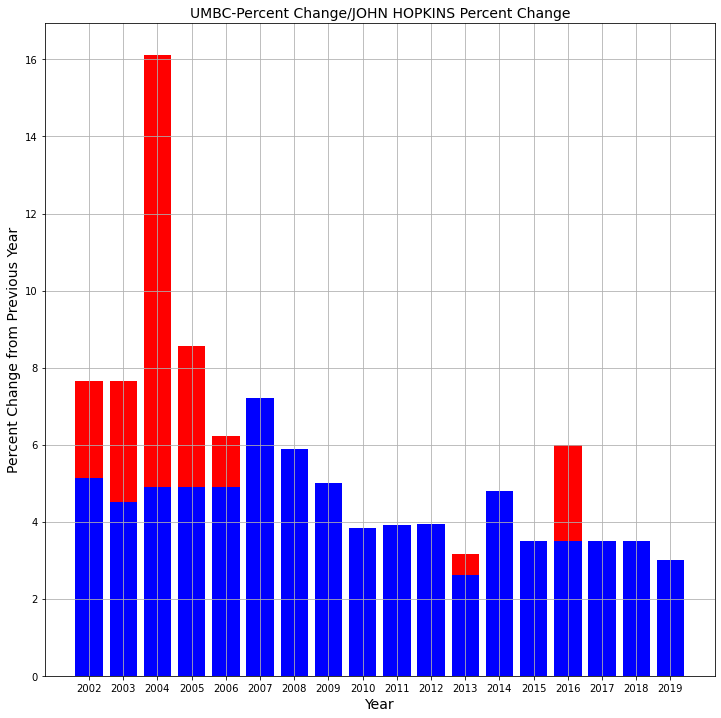

In [105]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge
# Now, merger the two data frames
# and display the new dataframe
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

Year = Years
Percent_Change = UMBC_Percent_Change
Percent_Change_2 = JOHN_H_PERCENT_CHANGE

fig, ax = plt.subplots(figsize=(12,12))

ax.bar(Year, Percent_Change, color='red')
ax.bar(Year, Percent_Change_2, color='blue')
ax.set_title('UMBC-Percent Change/JOHN HOPKINS Percent Change', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percent Change from Previous Year', fontsize=14)
ax.grid(True)

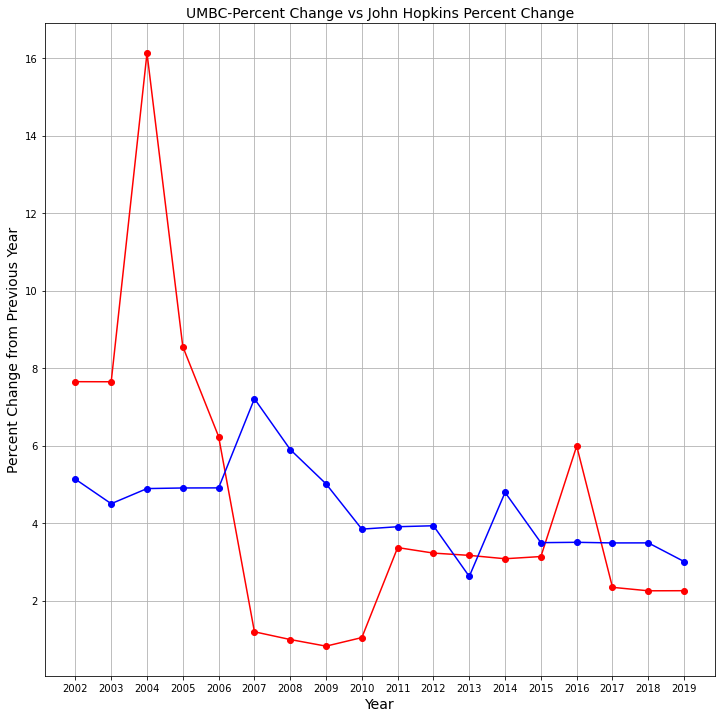

In [109]:
Year = Years
Percent_Change = UMBC_Percent_Change
Percent_Change_2 = JOHN_H_PERCENT_CHANGE

fig, ax = plt.subplots(figsize=(12,12))

ax.plot(Year, Percent_Change, color='red', marker='o')
ax.plot(Year, Percent_Change_2, color='blue', marker='o')
ax.set_title('UMBC-Percent Change vs John Hopkins Percent Change', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percent Change from Previous Year', fontsize=14)
ax.grid(True)

#19 Observations of plots/data

1.

<BarContainer object of 1 artists>

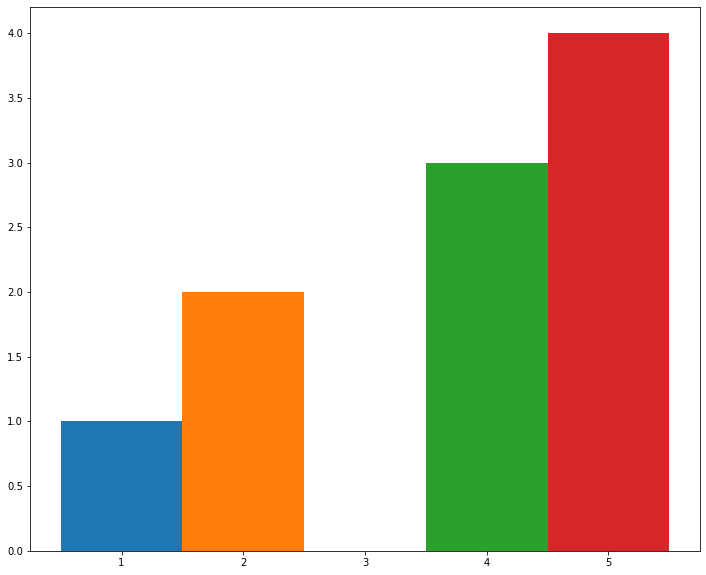

In [34]:
figure = plt.figure()
subplot = figure.add_subplot()

index = 1
width = 1

plt.bar(index, 1, width)
plt.bar(index + width, 2, width)

new_index = 4

plt.bar(new_index, 3, width)
plt.bar(new_index + width, 4, width)